# Tercera entrega de proyecto final

##### Modelo de predicción de la NBA

##### Equipo: Emiliano Jiménez y Santiago Córdova

Algoritmos:

- Regresión logística
- Keras
- Árbol de predicción

---

## 1er Algoritmo: Regresión Logística

In [1]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Escalar el dataset utilizando la función StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os

from sklearn.metrics import confusion_matrix, roc_curve, auc
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
nba_final_dataset = os.path.join('/content/drive/MyDrive/Colab Notebooks/Fashion/', 'nba_final_dataset.csv')
#1. Load dataset
df = pd.read_csv(nba_final_dataset)
#label encode the non numeric columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['team'] = le.fit_transform(df['team'])

In [4]:
# Select Features and Target
X = df.drop('playoffs', axis=1)  # Features
y = df['playoffs']  # Target

# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and Train the Logistic Regression Model
model = LogisticRegression(max_iter=1000)  # Increase max_iter
model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
accuracy_rl = accuracy
print(f"Accuracy: {accuracy:.5f}")

Accuracy: 0.93469


### Acurracy final para regresión logística: 0.93469

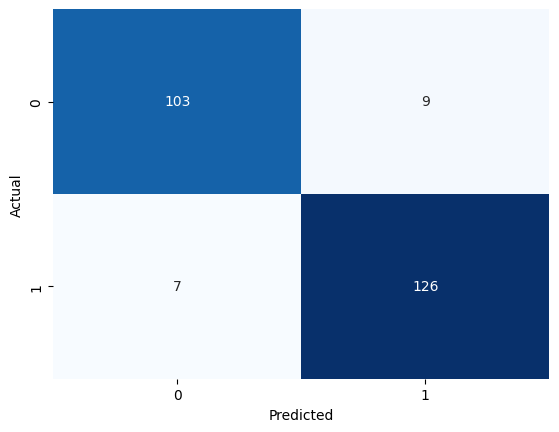

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

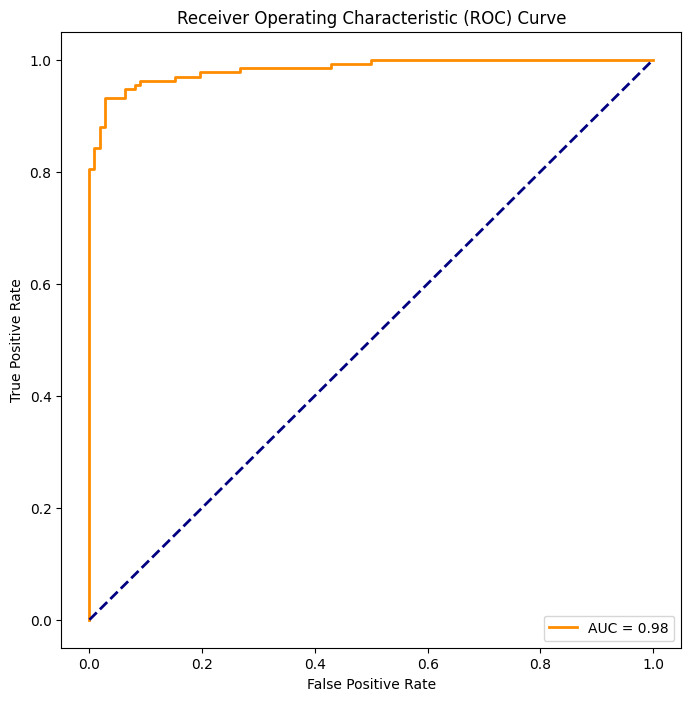

In [6]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict_proba(X_test_scaled)[:, 1]

# ROC curve
fpr, tpr, th = roc_curve(y_test, y_probs)

# Area Under the Curve
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


---

## 2do Algoritmo: Keras

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [8]:
nba_final_dataset = os.path.join('/content/drive/MyDrive/Colab Notebooks/Fashion/', 'nba_final_dataset.csv')
#1. Load dataset
df = pd.read_csv(nba_final_dataset)

In [9]:
X = df.drop('playoffs', axis=1)
y = df['playoffs']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Target variable to categorical
y_categorical = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
accuracy_k = accuracy
print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/50
31/31 [==============================] - 1s 10ms/step - loss: 0.8089 - accuracy: 0.5434 - val_loss: 0.5299 - val_accuracy: 0.7184
Epoch 2/50
31/31 [==============================] - 0s 3ms/step - loss: 0.4162 - accuracy: 0.8243 - val_loss: 0.3430 - val_accuracy: 0.8653
Epoch 3/50
31/31 [==============================] - 0s 4ms/step - loss: 0.3105 - accuracy: 0.8907 - val_loss: 0.2766 - val_accuracy: 0.8816
Epoch 4/50
31/31 [==============================] - 0s 3ms/step - loss: 0.2665 - accuracy: 0.8938 - val_loss: 0.2480 - val_accuracy: 0.8939
Epoch 5/50
31/31 [==============================] - 0s 4ms/step - loss: 0.2447 - accuracy: 0.8958 - val_loss: 0.2293 - val_accuracy: 0.8980
Epoch 6/50
31/31 [==============================] - 0s 3ms/step - loss: 0.2307 - accuracy: 0.9070 - val_loss: 0.2168 - val_accuracy: 0.9020
Epoch 7/50
31/31 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9081 - val_loss: 0.2117 - val_accuracy: 0.8980
Epoch 8/50
31/31 [=

8/8 [==============================] - 0s 2ms/step


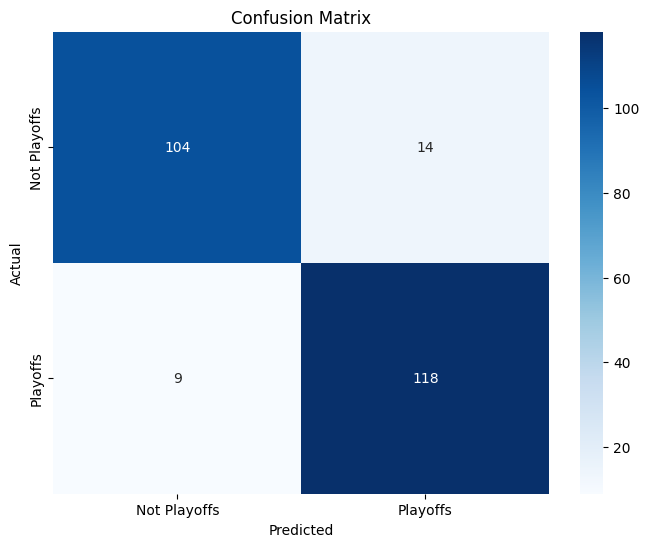

In [10]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Playoffs', 'Playoffs'], yticklabels=['Not Playoffs', 'Playoffs'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

---

# 3er Algoritmo DT-1 Árboles de Decisión

In [11]:
import pandas as pd

In [12]:
nba_final_dataset = os.path.join('/content/drive/MyDrive/Colab Notebooks/Fashion/', 'nba_final_dataset.csv')
#1. Load dataset
df = pd.read_csv(nba_final_dataset)
df

,season,team,playoffs,age,w,l,pw,pl,mov,sos,...,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga
0,2023,0,0,24.9,41.0,41.0,42.0,40.0,0.29,0.02,...,0.331,0.579,0.541,11.2,25.1,0.200,0.552,12.4,75.8,0.206
1,2023,1,0,27.4,57.0,25.0,57.0,25.0,6.52,-0.15,...,0.480,0.600,0.566,12.0,22.1,0.197,0.528,11.3,78.5,0.180
2,2023,2,0,28.0,45.0,37.0,43.0,39.0,0.85,0.18,...,0.397,0.598,0.562,12.7,19.6,0.208,0.530,12.2,73.7,0.212
3,2023,5,0,27.5,40.0,42.0,44.0,38.0,1.29,0.07,...,0.333,0.587,0.550,12.2,20.1,0.203,0.544,13.5,77.8,0.197
4,2023,4,0,25.3,27.0,55.0,26.0,56.0,-6.24,0.35,...,0.360,0.550,0.516,12.3,23.8,0.195,0.544,12.5,75.5,0.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,1980,31,1,26.9,41.0,41.0,40.0,42.0,-0.38,0.13,...,0.027,0.553,0.502,15.2,31.8,0.262,0.506,14.4,66.8,0.216
1220,1980,32,0,27.6,35.0,47.0,30.0,52.0,-4.15,0.18,...,0.072,0.522,0.482,14.6,34.2,0.213,0.503,14.2,65.4,0.215
1221,1980,33,1,27.0,56.0,26.0,53.0,29.0,4.66,-0.42,...,0.025,0.520,0.474,14.9,36.4,0.229,0.463,15.4,67.9,0.221
1222,1980,35,0,26.1,24.0,58.0,25.0,57.0,-6.01,0.31,...,0.027,0.547,0.500,16.7,29.7,0.230,0.500,13.5,67.1,0.237


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            1224 non-null   int64  
 1   team              1224 non-null   int64  
 2   playoffs          1224 non-null   int64  
 3   age               1224 non-null   float64
 4   w                 1224 non-null   float64
 5   l                 1224 non-null   float64
 6   pw                1224 non-null   float64
 7   pl                1224 non-null   float64
 8   mov               1224 non-null   float64
 9   sos               1224 non-null   float64
 10  srs               1224 non-null   float64
 11  o_rtg             1224 non-null   float64
 12  d_rtg             1224 non-null   float64
 13  n_rtg             1224 non-null   float64
 14  pace              1224 non-null   float64
 15  f_tr              1224 non-null   float64
 16  x3p_ar            1224 non-null   float64


In [14]:
df = df.drop(df.columns[0], axis=1)

In [15]:
#drop the season column
X = df.iloc[:, 0:24]
#drop the target column
X = X.drop('playoffs', axis=1)
# use y as the "team"(column 1), and playoffs (column 2), but use iloc to select the columns
y = df.iloc[:,1]
X.head()

,team,age,w,l,pw,pl,mov,sos,srs,o_rtg,...,f_tr,x3p_ar,ts_percent,e_fg_percent,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent
0,0,24.9,41.0,41.0,42.0,40.0,0.29,0.02,0.32,116.6,...,0.244,0.331,0.579,0.541,11.2,25.1,0.200,0.552,12.4,75.8
1,1,27.4,57.0,25.0,57.0,25.0,6.52,-0.15,6.38,118.0,...,0.243,0.480,0.600,0.566,12.0,22.1,0.197,0.528,11.3,78.5
2,2,28.0,45.0,37.0,43.0,39.0,0.85,0.18,1.03,115.0,...,0.260,0.397,0.598,0.562,12.7,19.6,0.208,0.530,12.2,73.7
3,5,27.5,40.0,42.0,44.0,38.0,1.29,0.07,1.37,113.5,...,0.251,0.333,0.587,0.550,12.2,20.1,0.203,0.544,13.5,77.8
4,4,25.3,27.0,55.0,26.0,56.0,-6.24,0.35,-5.89,109.2,...,0.261,0.360,0.550,0.516,12.3,23.8,0.195,0.544,12.5,75.5


In [16]:

#make 0 and 1 to NO or YES
y = y.replace({0:'NO', 1:'YES'})

In [17]:
y.head()

0    NO
1    NO
2    NO
3    NO
4    NO
Name: playoffs, dtype: object

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.25, random_state=0)

In [19]:
X_train.shape
X_test.shape

(306, 23)

In [20]:
from sklearn.tree import DecisionTreeClassifier

#Llamar al constructor del arbol de decisión
arbol = DecisionTreeClassifier()

#Entrenamos el modelo
arbol_nba = arbol.fit(X_train, y_train)
print(y.values)

['NO' 'NO' 'NO' ... 'YES' 'NO' 'YES']


<function matplotlib.pyplot.show(close=None, block=None)>

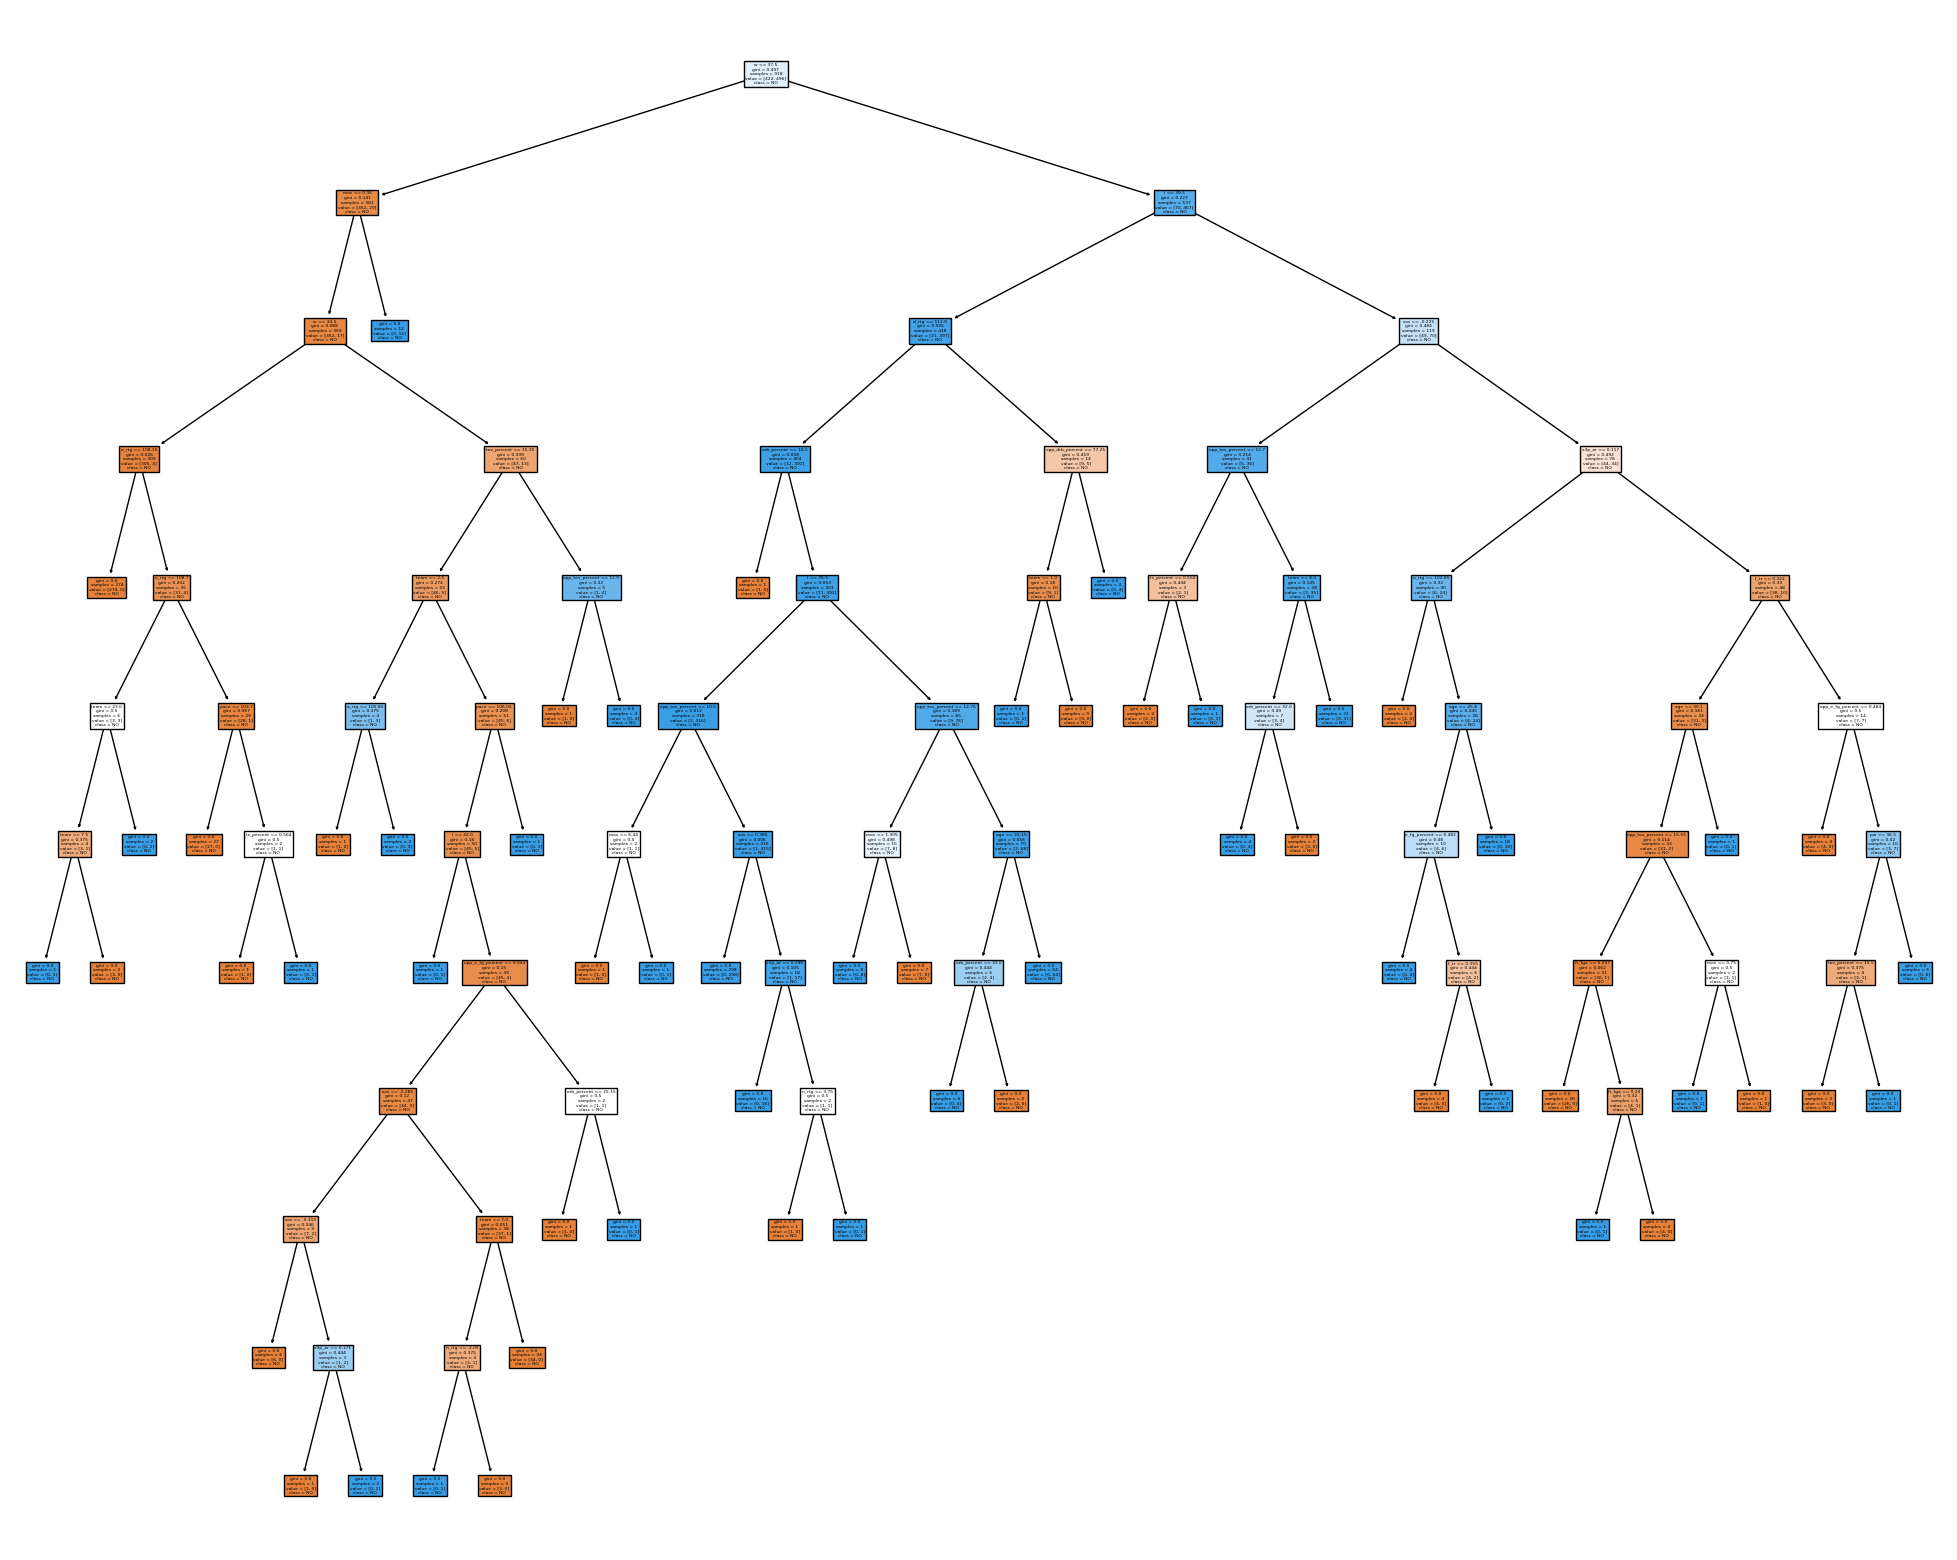

In [21]:
#Graficar el árbol

from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize = (25,20)) # dimensiones del gráfico
tree.plot_tree(arbol_nba, feature_names=list(X.columns.values), class_names = list(y.values), filled = True)
plt.show

In [22]:
fig.savefig("Arbol.svg")

In [23]:
Y_pred = arbol_nba.predict(X_test)
Y_pred

array(['NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO',
       'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO',
       'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES',
       'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO',
       'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES',
       'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES',
       'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES',

In [24]:
# precisión del modelo

from sklearn.metrics import confusion_matrix

MC = confusion_matrix(y_test, Y_pred)
MC

array([[111,  19],
       [ 13, 163]])

In [25]:
import numpy as np

acc_global = np.sum(MC.diagonal()) / np.sum(MC)
acc_global

0.8954248366013072

In [26]:
acc_NO = MC[0,0] / sum(MC[0,])
acc_NO

0.8538461538461538

In [27]:
acc_SI = MC[1,1] / sum(MC[1,])
acc_SI

0.9261363636363636

[[114  16]
 [ 13 163]]
Acc global: 0.9052287581699346
Acc no:  0.8769230769230769
Acc si:  0.9261363636363636


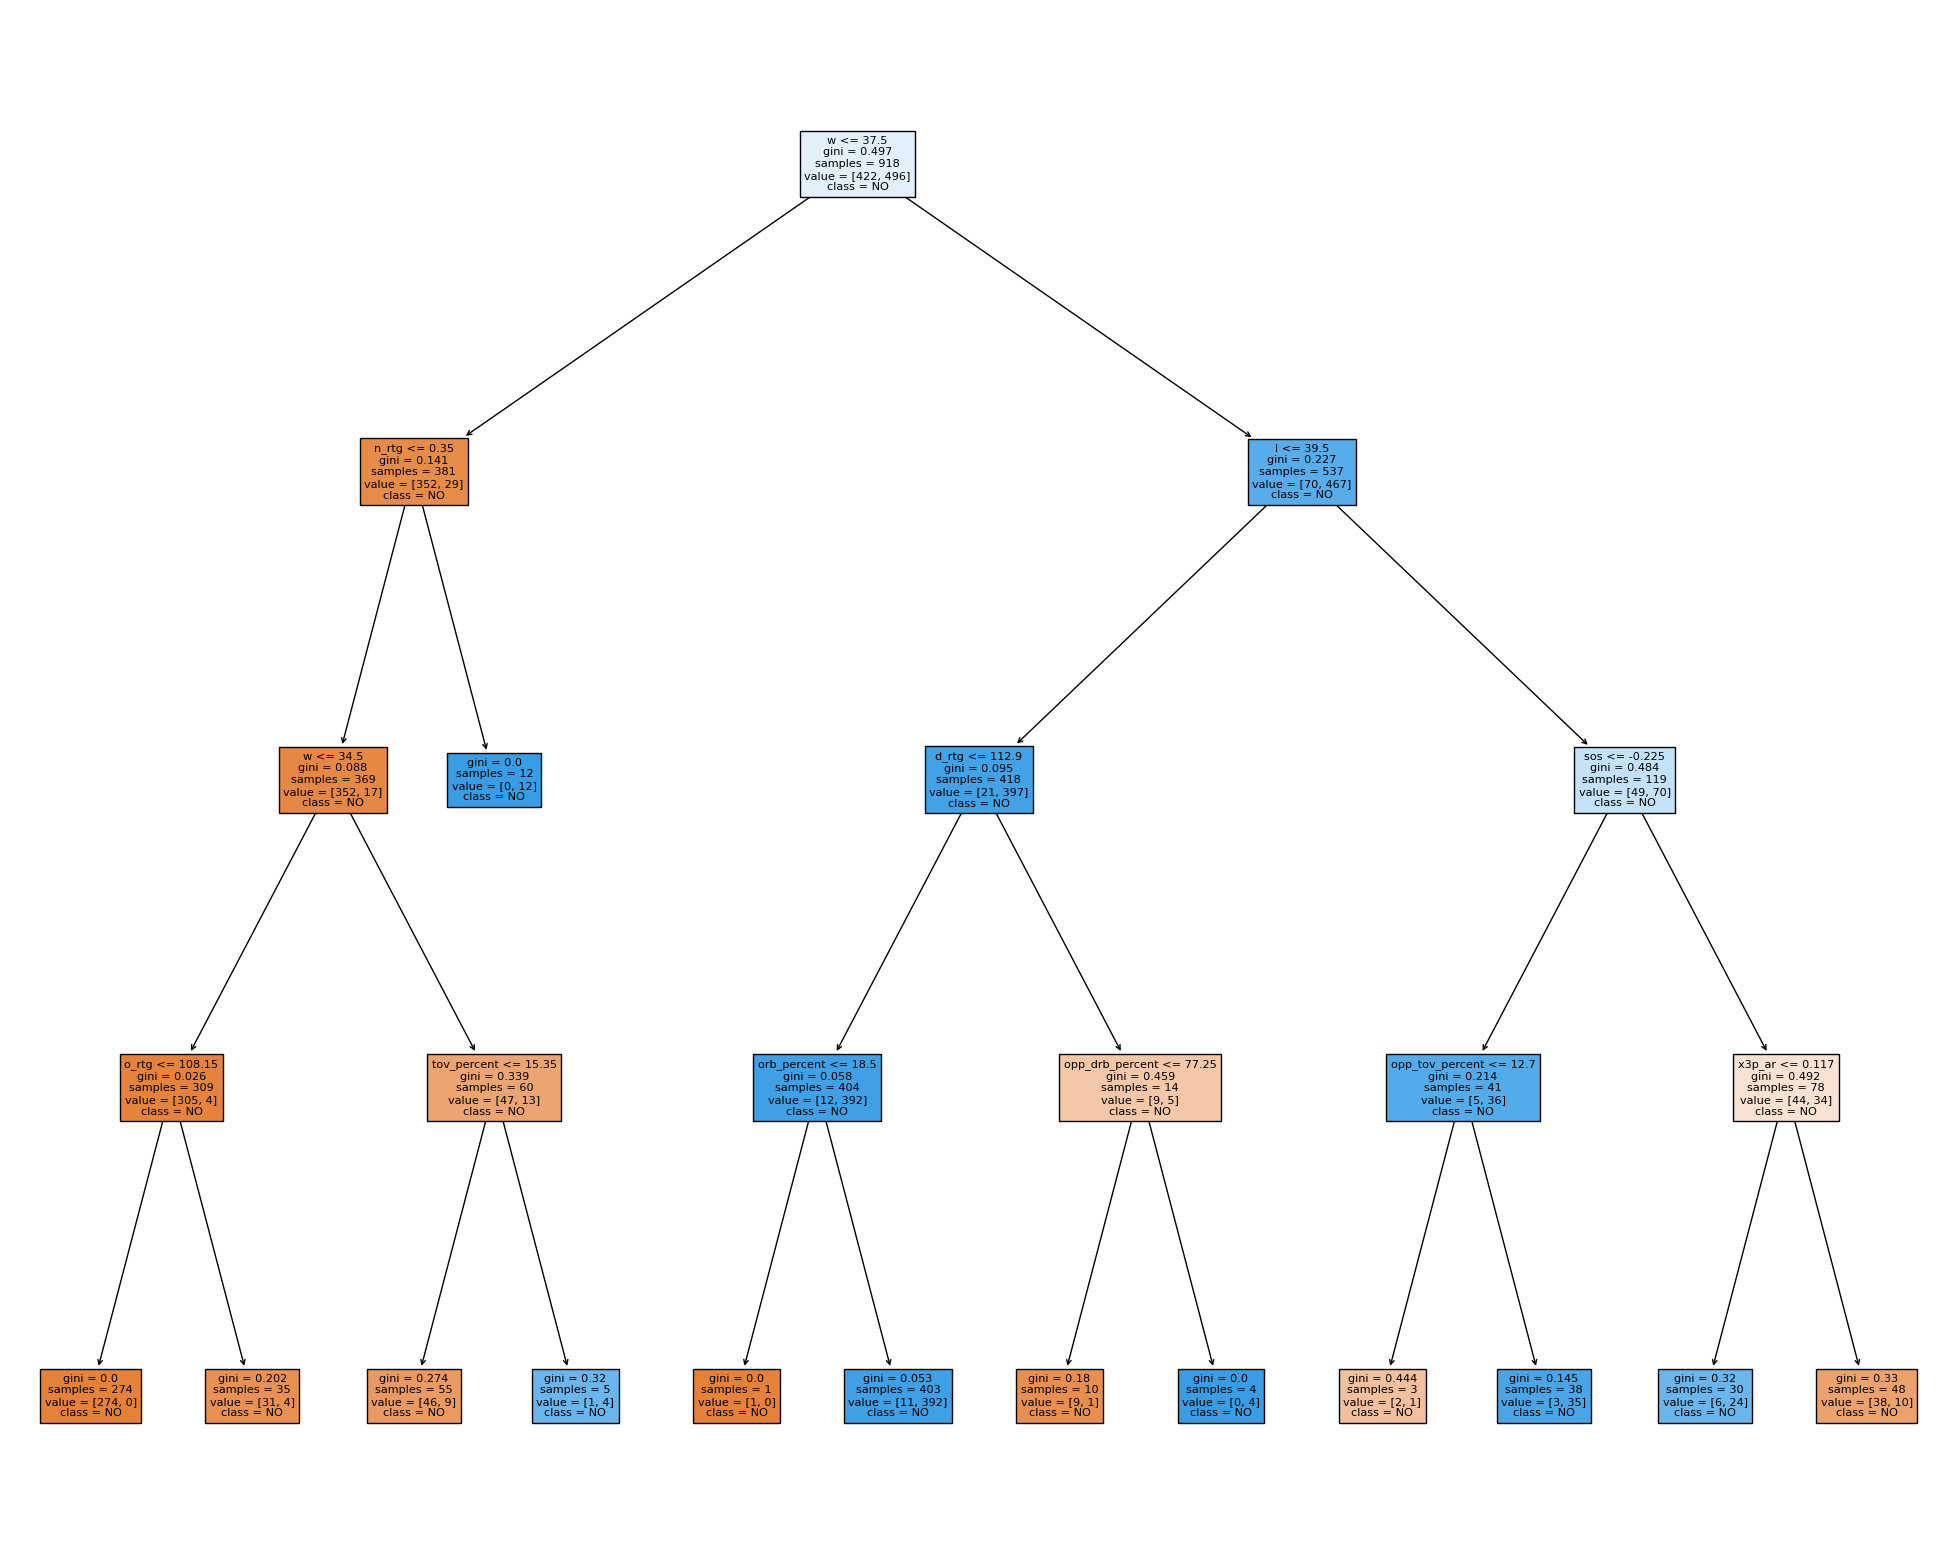

In [28]:
#Llamar al constructor del arbol de decisión
arbol = DecisionTreeClassifier(max_depth = 4)

#Entrenamos el modelo
arbol_nba = arbol.fit(X_train, y_train)

#Graficar el árbol
fig = plt.figure(figsize = (25,20)) # dimensiones del gráfico
tree.plot_tree(arbol_nba, feature_names=list(X.columns.values), class_names = list(y.values), filled = True)
plt.show

Y_pred = arbol_nba.predict(X_test)

MC = confusion_matrix(y_test, Y_pred)
print(MC)

acc_global = np.sum(MC.diagonal()) / np.sum(MC)
acc_global
accuracy_dt = acc_global
print("Acc global:",acc_global)

acc_NO = MC[0,0] / sum(MC[0,])
acc_NO
print("Acc no: ",acc_NO)

acc_SI = MC[1,1] / sum(MC[1,])
acc_SI
print("Acc si: ",acc_SI)

In [29]:
#fig.savefig("ArbolMax4Depth.svg")

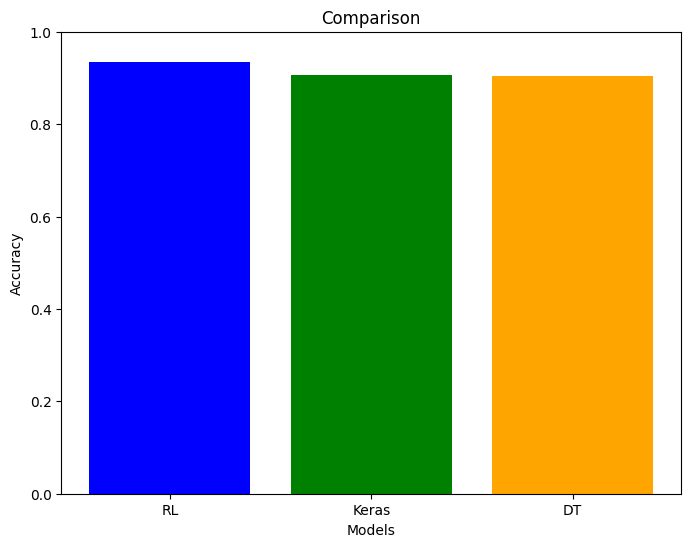

In [31]:
accuracies = [accuracy_rl, accuracy_k, accuracy_dt]
labels = ['RL', 'Keras', 'DT']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.title('Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()